In [7]:
#Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('Data.csv')
print(df.head())



   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...     

In [9]:
#  Checking for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Displaying missing values as a percentage of the total values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Displaying missing values and their percentage in a DataFrame
missing_info = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)

                                            Missing_Values  Percentage
rank                                                     0    0.000000
finalWorth                                               0    0.000000
category                                                 0    0.000000
personName                                               0    0.000000
age                                                     65    2.462121
country                                                 38    1.439394
city                                                    72    2.727273
source                                                   0    0.000000
industries                                               0    0.000000
countryOfCitizenship                                     0    0.000000
organization                                          2315   87.689394
selfMade                                                 0    0.000000
status                                                   0    0.000000
gender

In [13]:
# Define the columns to drop
columns_to_drop = ['organization', 'title', 'state', 'residenceStateRegion']

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Print or display the updated DataFrame
print(df.head())

KeyError: "['organization', 'title', 'state', 'residenceStateRegion'] not found in axis"

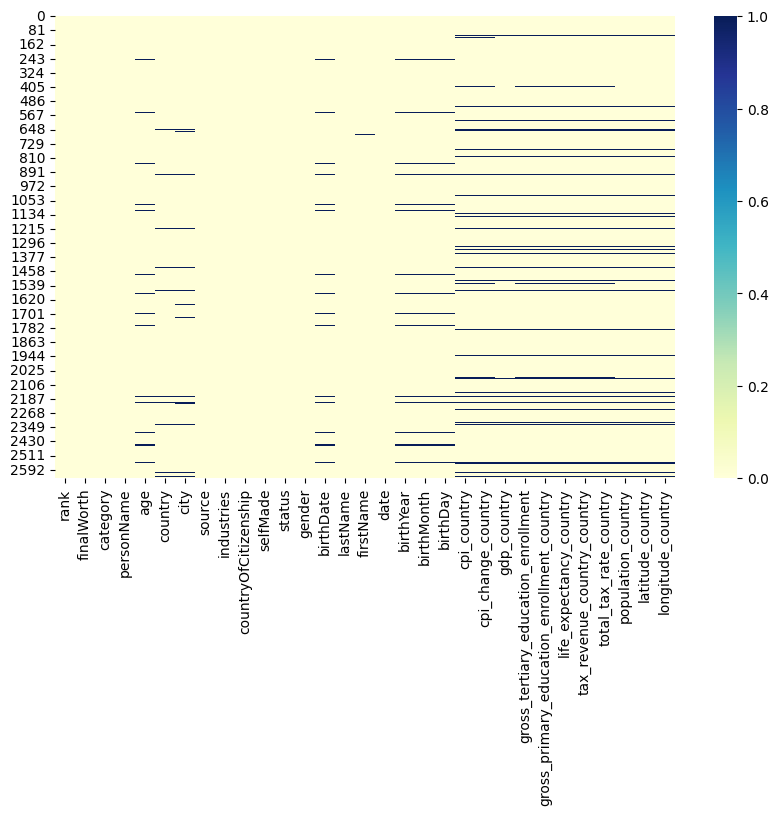

In [21]:
# Visualizing missing values using
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar={'label': 'Missing Data'}, cmap='YlGnBu')
plt.show()

Percentage % of Males and Females in the Dataset:
gender
M    87.23
F    12.77
Name: proportion, dtype: float64


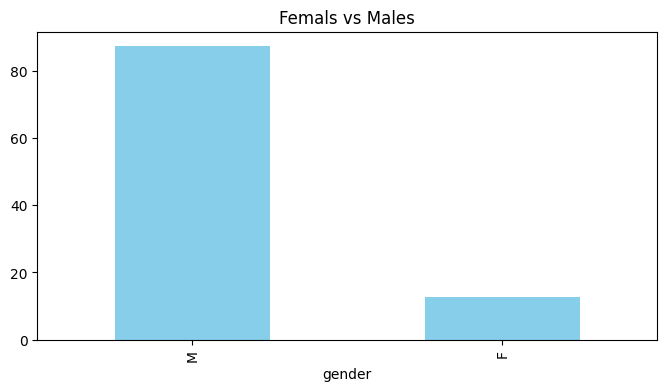

In [76]:
# Calculating the percentage of males and females
gender_counts = df['gender'].value_counts(normalize=True)*100

# Display the result
print("Percentage % of Males and Females in the Dataset:")
print(gender_counts.round(2))

#visualising the genders in the dataset
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Femals vs Males')
plt.show()


Percentage Count of Self-Made and Inherited Billionaires:
      Status  Percentage %
0  Self-Made         68.64
1  Inherited         31.36


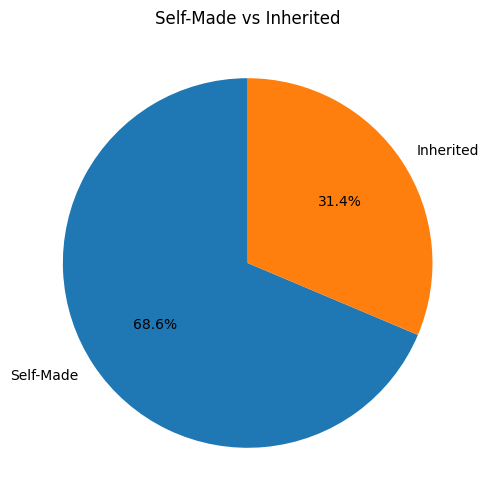

In [17]:

# Calculating the percentage count of self-made and inherited billionaires
self_made_counts = df['selfMade'].value_counts(normalize=True) * 100

# Creating a DataFrame from the percentages
self_made_percentage_table = pd.DataFrame({
    'Status': ['Self-Made', 'Inherited'],
    'Percentage %': self_made_counts.values
})

# Displaying the result
print("Percentage Count of Self-Made and Inherited Billionaires:")
print(self_made_percentage_table.round(2))


#now  visualing the self made and inherited billionaires 
plt.figure(figsize=(10, 6))
plt.pie(self_made_counts, labels=['Self-Made', 'Inherited'], autopct='%1.1f%%', startangle=90)
plt.title('Self-Made vs Inherited')
plt.show()


In [73]:
#function to find statistics for numerical columns

def categorical_descriptive_stats(column):
    
    print(f" Statistics for '{column.name}':")
    
    # Frequency Counts
    frequency_counts = column.value_counts()
    print(f"Frequency Counts:\n{frequency_counts}\n")
    
    # Mode
    mode_value = column.mode().iloc[0]
    print(f"Mode: {mode_value}\n")
    
    # Unique Values
    unique_values = column.unique()
    print(f"Unique Values:\n{unique_values}\n")
    


 Statistics for 'industries':
Frequency Counts:
industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

Mode: Finance & Investments

Unique Values:
['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Cons

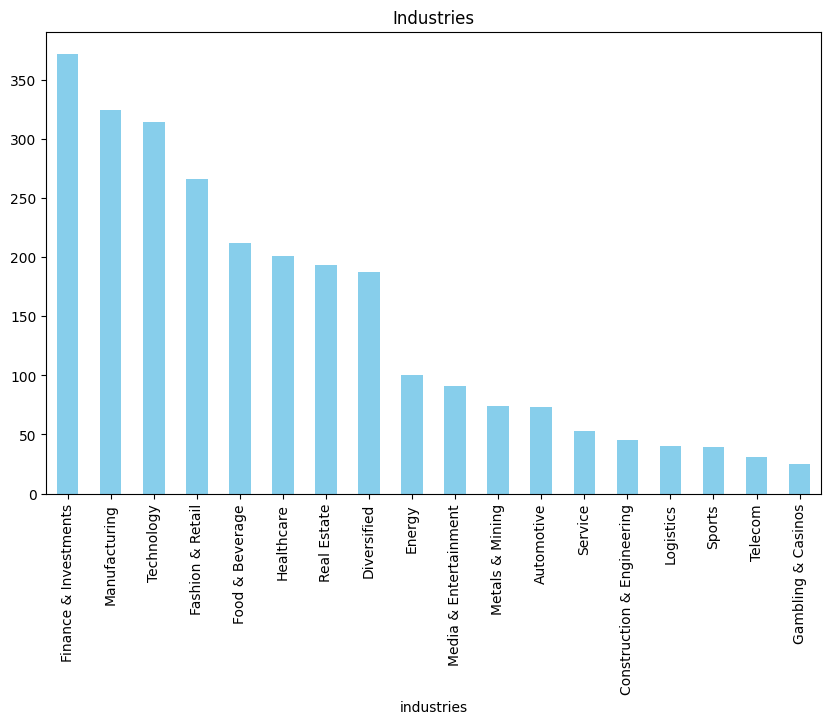

In [29]:

# Checking the industry with most Billionaires 
categorical_descriptive_stats(df['industries'])

#visualing the data
plt.figure(figsize=(10, 6))
df['industries'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Industries with most Billionaires')
plt.show()


 Statistics for 'country':
Frequency Counts:
country
United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

Mode: United States

Unique Values:
['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' nan 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Geo

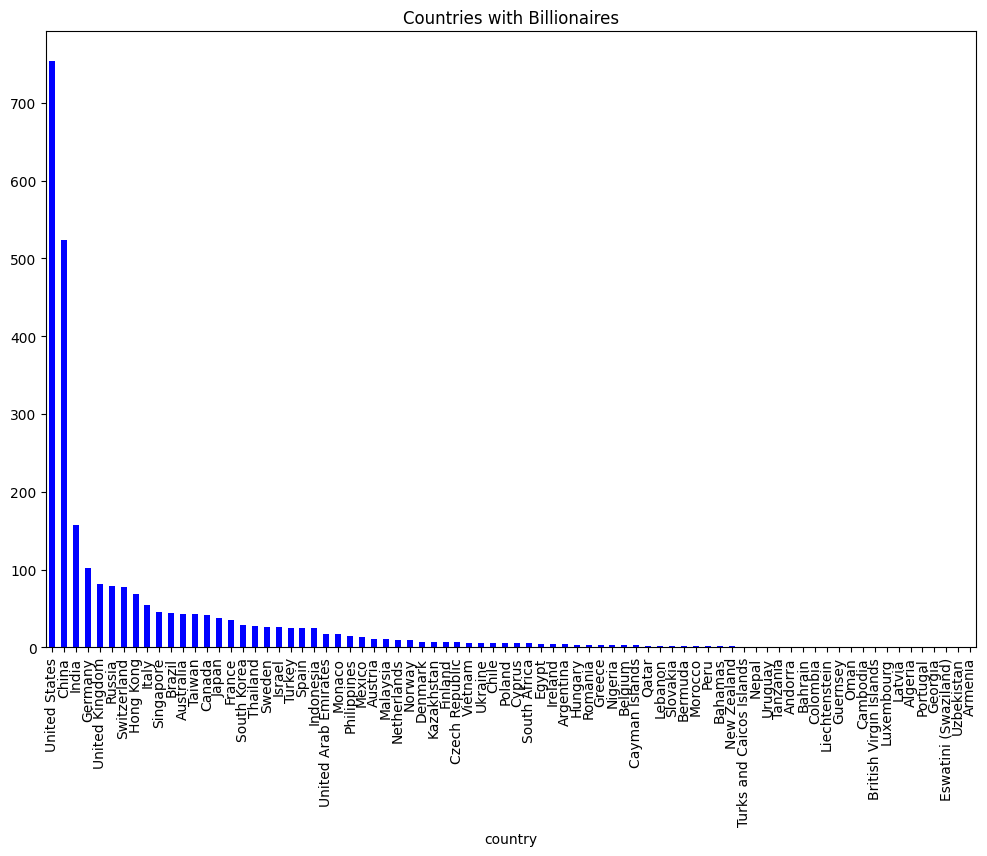

In [40]:
# countries with most billionaires
categorical_descriptive_stats(df['country'])
plt.figure(figsize=(12, 8))
df['country'].value_counts().plot(kind='bar', color='blue')
plt.title('Countries with Billionaires')
plt.show()

Top Countries with Billionaires:
Index(['United States', 'China', 'India', 'Germany', 'United Kingdom',
       'Russia', 'Switzerland', 'Hong Kong', 'Italy', 'Singapore'],
      dtype='object', name='country')


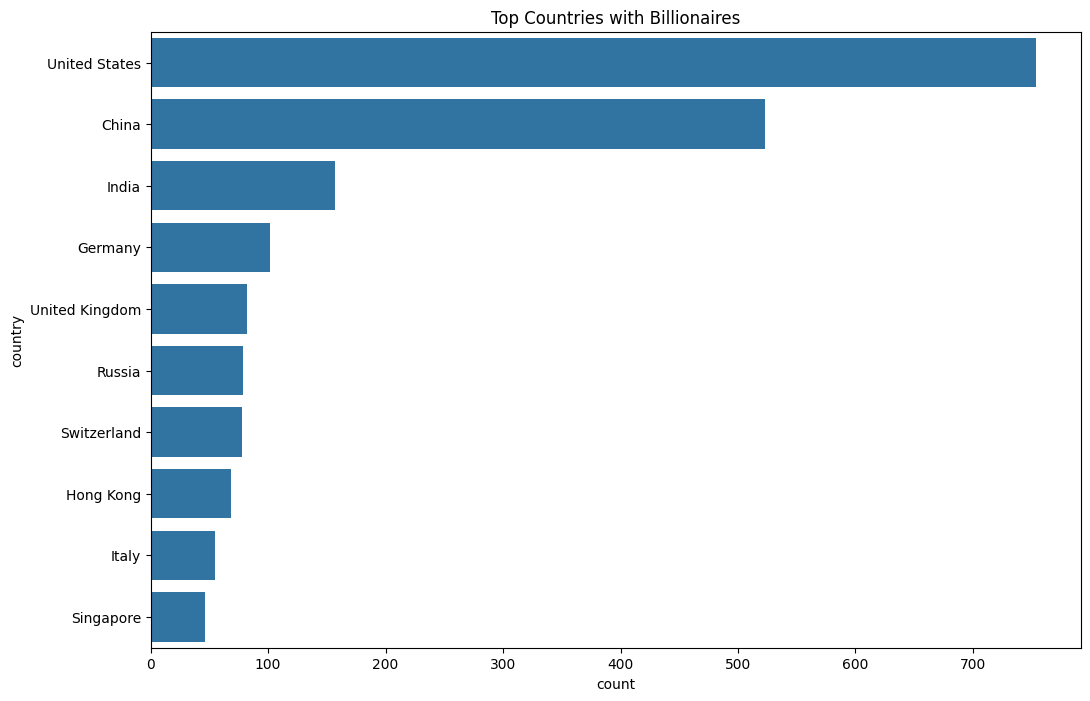

In [58]:
#checking which country has most billionaires
top_countries_billionaires = df['country'].value_counts().head(10).index

# Print the list of top countries with billionaires
print('Top Countries with Billionaires:')
print(top_countries_billionaires)

#visualing the top 10 countries with billionaires
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=df, order=top_countries_billionaires)
plt.title('Top Countries with Billionaires')
plt.show()



Average Age:
country
United States     67.306366
China             58.696429
India             68.458599
Germany           64.647727
United Kingdom    62.700000
Russia            59.101266
Switzerland       66.120000
Hong Kong         67.712121
Italy             66.890909
Singapore         66.173913
Name: age, dtype: float64


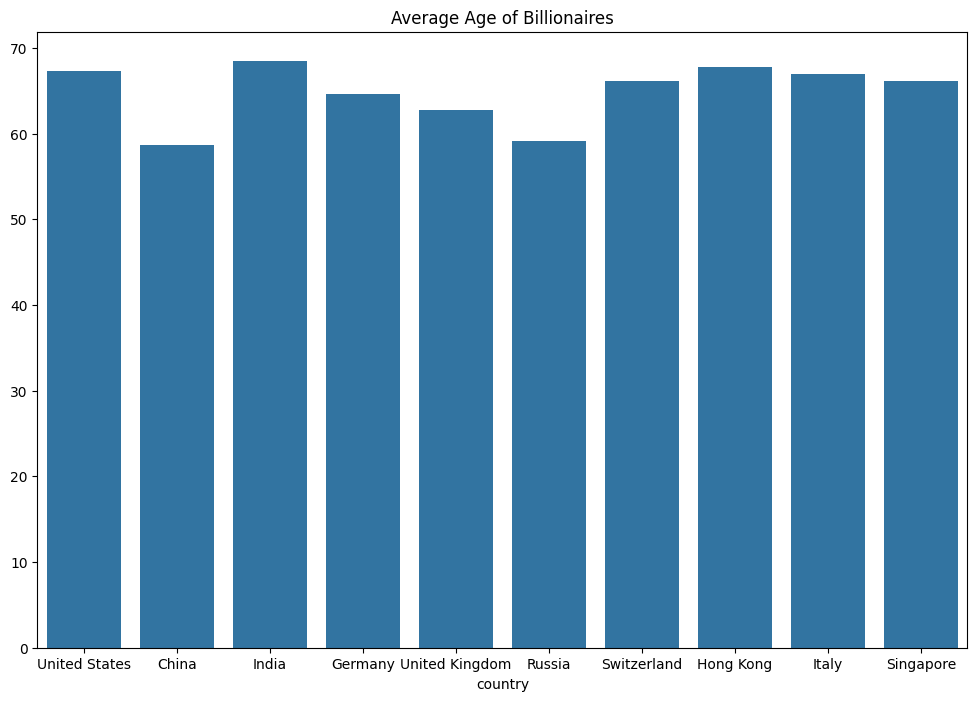

In [59]:
#checking the avarage  of the billionaires in each country
top_countries_billionaires = df['country'].value_counts().head(10).index

# Calculate the average age of billionaires for the top countries
average_age = df.groupby('country')['age'].mean().loc[top_countries_billionaires]
print('Average Age:')
print(average_age)

#visualing the average age of billionaires for the top countries
plt.figure(figsize=(12, 8))
sns.barplot(x=average_age.index, y=average_age.values)
plt.title('Average Age of Billionaires in top countries')
plt.show()



In [60]:

top_countries_billionaires = df['country'].value_counts().head(10).index


# Filter the DataFrame to include only billionaires from the top countries
filtered_df = df[df['country'].isin(top_countries_billionaires)]

# Calculate the average tax rate for the selected countries
average_tax_rate = filtered_df['total_tax_rate_country'].mean()
print(f'Average Tax Rate: {average_tax_rate:.2f}%')


Average Tax Rate: 44.76%


In [79]:
# Group the data by country and calculate the average tax rate
average_tax_rate_country = df.groupby('country')['total_tax_rate_country'].mean()

# Find the country with the highest tax rate
country_with_highest_tax_rate = average_tax_rate_country.idxmax()
# Print the result along with the percentage value
print(f"The country with the highest tax rate is: {country_with_highest_tax_rate} ({average_tax_rate_country[country_with_highest_tax_rate]:.2f}%)")



The country with the highest tax rate is: Argentina (106.30%)


In [65]:
#checking most involoved Gender in the industries
industry_gender_counts = df.groupby(['industries', 'gender']).size().unstack()
industry_gender_counts['Most Involved'] = industry_gender_counts.idxmax(axis=1)
print(industry_gender_counts['Most Involved'])


industries
Automotive                    M
Construction & Engineering    M
Diversified                   M
Energy                        M
Fashion & Retail              M
Finance & Investments         M
Food & Beverage               M
Gambling & Casinos            M
Healthcare                    M
Logistics                     M
Manufacturing                 M
Media & Entertainment         M
Metals & Mining               M
Real Estate                   M
Service                       M
Sports                        M
Technology                    M
Telecom                       M
Name: Most Involved, dtype: object


In [66]:
#checking the industry with highest success rate with Female

# Grouping the data by industry and gender
industry_gender_counts = df.groupby(['industries', 'gender']).size().unstack()

# Geting the count of women in each industry
women_counts = industry_gender_counts['F']

# Finding the industry with the highest count of women
most_involved_industry = women_counts.idxmax()

print(f"The industry with the most involved women is: {most_involved_industry}")


The industry with the most involved women is: Food & Beverage


In [72]:
#checking the most involved industry with self made billionaires
# Grouping the data by industry and selfMade status
industry_selfmade_counts = df.groupby(['industries', 'selfMade']).size().unstack()

# Geting the count of self-made billionaires in each industry 
selfmade_counts = industry_selfmade_counts[True]

most_involved_industry = selfmade_counts.idxmax()

print(f"The industry with the most involved self-made billionaires is: {most_involved_industry}")


The industry with the most involved self-made billionaires is: Technology


c:\Users\Abdullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.13257575757575757
Precision: 0.025602157499914274
Recall: 0.13257575757575757
F1-score: 0.042365704173153974


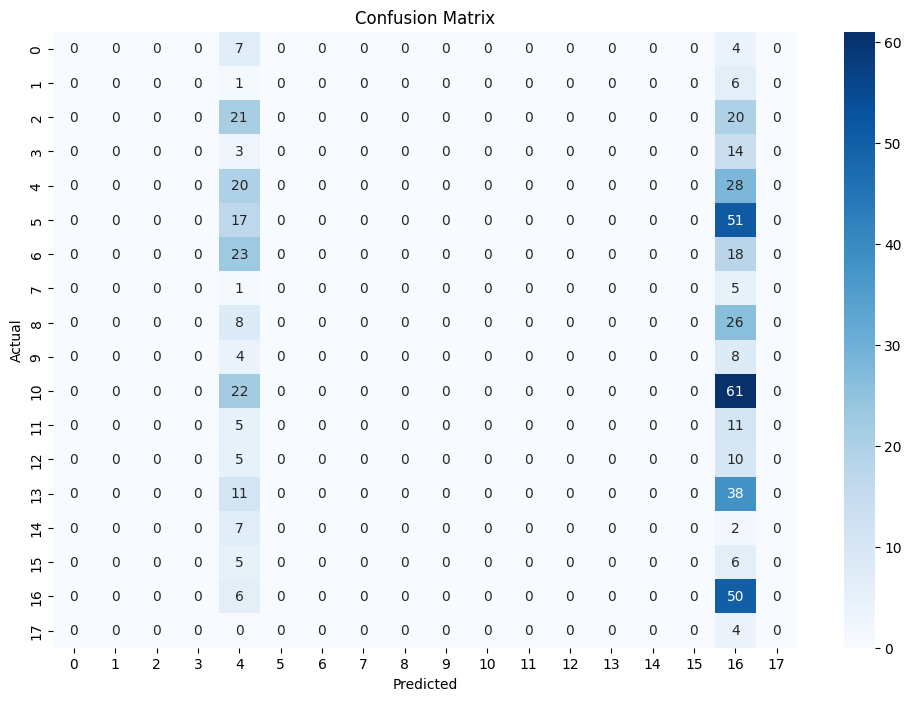

In [114]:

features = ['selfMade']
target = 'industries'

X = df[features]
y = df[target]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing a classification algorithm and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#now printing the confusion matrix
confusion_matrix(y_test, y_pred)

#ploting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

